# Introduction to Time Series

## Aims, applications and attributes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
import re


def parse_quarter(string):
    """
    Converts a string from the format YYYYQN in datetime object at the end of quarter N.
    """

    # Note: you could also just retrieve the first four elements of the string
    # and the last one... Regex is fun but often not necessary
    year, qn = re.search(r"^(20[0-9][0-9])(Q[1-4])$", string).group(1, 2)

    # year and qn will be strings, pd.datetime expects integers.
    year = int(year)

    date = None

    if qn == "Q1":
        date = pd.Timestamp(year, 3, 31)
    elif qn == "Q2":
        date = pd.Timestamp(year, 6, 30)
    elif qn == "Q3":
        date = pd.Timestamp(year, 9, 30)
    else:
        date = pd.Timestamp(year, 12, 31)

    return date

## Time series

A time series is a **series of data points given in time order**. 
   
In standard machine learning:
   
   * no specific ordering of the data
   * data points are considered to be **independent** from each other.
   
In time series analysis:
   
   * a specific structure and dependency of the data, given by its **chronological nature**
   * e.g. recent values are potentially more relevant than older ones for forecasting



A time series, as its name indicates, is a sequence of data points that are given in order. 

This is often not the case with standard machine learning algorithms, where there is no specific ordering of the data. In fact, in many cases the observations might be ordered, but the time component is deemed irrelevant and discarded. For example, consider a clinical dataset where we may have information about patients that undergo surgery. In this case, we may have a column that indicates the date and time of the day when the surgery was performed. However, we may decide to discard this variable, as it may be considered it trivial for the outcome of the surgery. 

Another important assumption in most machine learning algorithms is that observations are independent from each other (e.g. the outcome of the surgery for a patient does not influence the outcome of another surgery). This is not the case in time series, where past data influences future data. For example, the temperature today is not completely independent from the temperature yesterday.

## An example of a time series
**Question**: What can you appreciate in the following data?

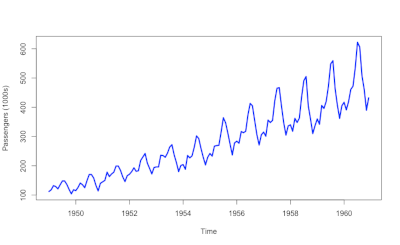

* Standard machine learning could be applied here ignoring the structure of the data (e.g. using autoregressive models) and thus **losing valuable information**. 
* Time series analysis aims to fulfill this gap, building **models that can specifically account for such structure and benefit from it**.

    


We have here our first graphical representation of a time series, showing the amount of train passengers over time. 

Question: What can you appreciate from this data? (Answer: We can firstly see that each year there are periods with more travel and vice versa. This is called seasonality. We can also observe a growing trend in the number of passengers over time.)

Standard machine learning algorithms could be applied to this type of data (and it is often done to get an understanding of the baseline performance that one could expect). In the case of time series forecasting, we aim to predict the future (e.g. next step in time) based on the past data. To apply standard ML here we can set a window of for example 10 days that would make our input features. In the case of this application the output target could be predicting the amount of train passengers tomorrow (or perhaps in a weeks time). That is, we would be predicting how many passengers there will be in the future based on the data of the last 10 days (or the amount of time that we set for the window). This set of models are called autoregressive. However, the main issue here is that we are losing very valuable information, i.e. the notion that time is continuous. This is because the regressor would received 10 input features but it would not know that those follow a specific chronological order. 

This is where specific time series models come into play. This field is focused on building models specifically suited for dealing with such time structures and benefit from it. These models also solve some of the shortcomings from autoregressive models, e.g. needing a fixed window size.

## Other highly structured data

**Question**: Can you think of other cases in which data might show a structure?

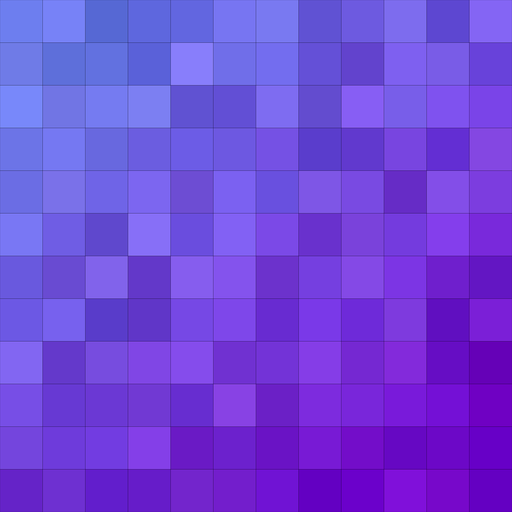


Question: Can you think of other highly structured data? (a hint is given by the picture shown).

Answer: There are many other types of data that show a structure, and there are usually specific ML models to deal with those (at least until we develop ML algorithms that can exploit any given structure!). The most obvious example are images, where each pixel is surrounded by 8 other pixels and there is lots of relevant spatial information. We could have exactly the same pixels in two images but these might form completely different shapes due their surroundings. Other examples could be: geospatial data, video (which include both imaging and time series) or even data coming in the form of graphs. 

## Time series applications

The list of applications in which time series are commonly found is vast and these span many different knowledge domains (all of which have a **crucial temporal component!**):
* video and speech processing
* natural language processing
* economic and sales forecasting
* meteorological applications 
* analysis and prediction of physiological signals

<br>
**Order makes a difference**:

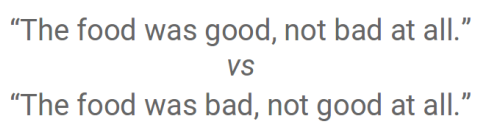



There are many ML applications that have a crucial temporal component. One example is video and speech processing, as we just mentioned. Order is actually very relevant for any application related to natural language processing. As you can see in the example shown, the order of the words may completely change the semantics of the sentence. 

Finance is also one of the fields that have really pushed forward our understanding and development of time series analysis. Other examples comprise metereological applications and analysis of physiological signals (e.g. with wearable devices). But there are obviously many more!

## Aims of this session

* Introduce the concept of time series. 
* Understand the different factors commonly found in these datasets.
* Provide a compact mathematical formulation of time series data.
* Explore some key attributes of time series

This session is intended to introduce in general terms the concept of time series, understanding the different factors that might be included in this type of data (e.g. seasonality). We will also see a compact mathematical representation of a time series and show how to identify some key attributes.

## Aim and use cases of time series analysis

Time series analysis is generally used for: 
1. Obtaining an understanding of the **underlying forces and structure that produced the observed data**. 
2. **Fitting a model** to do forecasting, monitoring, hypothesis testing and simulations. 




So, now we know that time series deals specifically with datasets in which our observations or data points are given in chronological order. But what can we use these methods for? Time series analysis is generally used for obtaining an understanding of the underlying forces that produced the observed data. But it can also be used for fitting models that can predict the data, hypothesis testing, simulations, etc. 

## Compact representation of time series

💡**Main idea so far**: data points taken over time may have an internal structure (such as **autocorrelation, trend or seasonal variation**) that should be accounted for.

For **forecasting we often look for a model** of the form: 
$$x_{t+1} = f(X_{t}) + T_t + S_t + N_t, $$
where $f$ is our forecasting function, $X_t$ is the past data and $T_t$, $S_t$ and $N_t$ are respectively the trend, seasonality and noise factors. 

<br>
✏️ **In this unit** we will see techniques aimed at preprocessing time series, to reduce the effect of factors such as seasonality, trend and noise.

Let's quickly recap. We have seen that one crucial concept in time series is that if we consider our observations over time these might show trend, seasonality or autocorrelation. Autocorrelation indicates that the values observed in the present are correlated with the values from the past. We also know that we can benefit significantly from exploiting this type of structured data with time series specific techniques.

Usually if we are aiming to build a forecasting model, we would look for a model of the form indicated here, where $X_t$ (with capital X) indicates all the data until the present instant t and $x_{t+1}$ is the next instant. Note that it doesn't necessarily need to be t+1, it could be +2, +3, etc, depending on what time horizon we want to predict. So, we can see we are aiming to find a function f that would allow us to predict a value based on some input features (i.e. the past). 

However, as we said before there are other factors in a time series that are not driven by the underlying model and these are usually explicitly included in the formulation. These are $T_t, S_t$ and $N_t$, which are respectively the trend, seasonality and noise. Normally, we would have to remove these by some preprocessing techniques before learning our function f. This is exactly what we will see in this unit. 

## Time series decomposition analysis

Time series data can be composed of a lot of different patterns, and so it is often helpful to consider these constituent behaviours, each representing an underlying pattern. Three key aspects we often think about are:

* **Trend**: a long term increase or decrease in the data
* **Seasonality**: a repeating pattern in the data (e.g.: days of the week, quarters of the year)
* **Noise**: a non-deterministic element in the data, i.e. random fluctuations

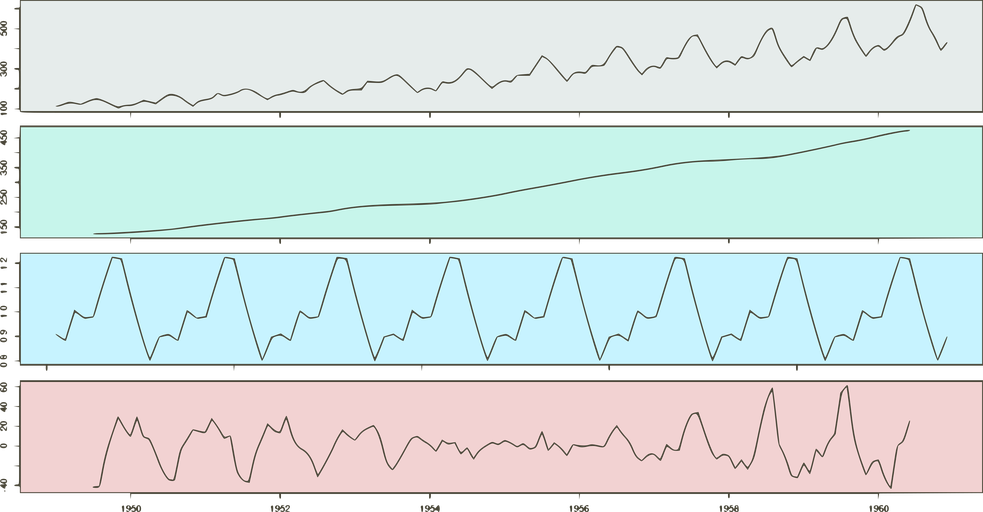

Here we can see a decomposition for a similar time series to the one that we saw before, and how each of the factors would look like separately. 

In this case, we have generated each factor independently and then added them, to see what the final signal would look like. The final aggregated time series is represented in the first plot (gray one). The second plot (in green) depicts the trend. The third one shows seasonality (in blue). The last plot shows the noise. 

We can thus see how the addition of these 3 factors together would produce a time series similar to the one we saw before. 

## Bikes dataset

We will work now with the multivariate time series "bikes" dataset. The dataset includes the **number of bikes rented per month and the average metereological conditions**. 

* Load the data `bikes.csv`
* Specify that you want to parse the column `'dates'` as dates using `parse_dates=['dates']`
* Use the dates as the index column


In [3]:
bikes = pd.read_csv("data/bikes.csv", parse_dates=["date"], index_col="date")
bikes.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,2.716070,45.715346,21.414957,120.0
2011-01-04,2.896673,54.267219,15.136882,108.0
2011-01-05,4.235654,45.697702,17.034578,82.0
2011-01-06,3.112643,50.237349,10.091568,88.0
2011-01-07,2.723918,49.144928,15.738204,148.0


We are going to be working with the bikes dataset, which contains the amount of bikes rented (represented in count) for different dates and also some metereological variables (temperature, humidity and windspeed). 

With this code snippet we are reading the dataset csv file and parsing it per date. We are also indicating that we want to use the date as the index column. 

Finally, we visualise the head of the dataframe to verify that everything looks correct. 

## Visualising time series data

Visualising data is a crucial part of any data analysis task, and time series analysis is no different. By visualising time series, we can gain key information that will shape what approaches we use, and identify important features. For example, is there a trend in the data, a seasonal component? Is there perhaps sparsity behaviour that changes over time? 

For this dataset, let's display the temperature time series (you can either use `pandas` plotting facility by doing `bikes.plot(...)` or use `matplotlib` directly)


<Axes: xlabel='date'>

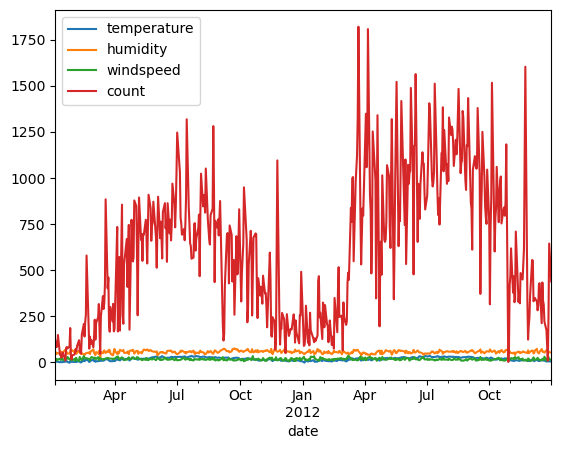

In [4]:
bikes.plot()

For our bikes dataset, we can observe a high variability in the count variable, as well as some seasonality, as bike rentals increase in the summer and decrease in the winter. 

We can also see that we may need to plot each variable separately, as they are in different scales, which make temperature, humidity and windspeed look like constants, which should not be the case!

We can also use plotly express to create interactive time series plots quickly. This can be especially useful for large time series where we may want to scan, zoom or select points. 

**A really nice feature is we can click on a legend entry and toggle whether to see that variable. This is great for when the time series are on different scales.**

In [5]:
fig = px.line(
    bikes.reset_index(), x="date", y=bikes.columns, title="Bikes Data"
)
fig.show()

## Correlation

Time series may be univariate or multivariate (e.g. bikes dataset), so we may have correlated variables.

In [6]:
bikes.corr()

,temperature,humidity,windspeed,count
temperature,1.000000,0.096621,-0.139471,0.740959
humidity,0.096621,1.000000,-0.253124,-0.149185
windspeed,-0.139471,-0.253124,1.000000,-0.162707
count,0.740959,-0.149185,-0.162707,1.000000


Time series may be univariate (as the case we shown at the beginning of the unit with the train passengers example) or multivariate (e.g. the bikes dataset where we have multiple time series). Often we might have correlated variables, to check this we can simply apply the corr function to the dataframe. What we can see from this matrix of correlations is that the most correlated variables are temperature and count. A high correlation indicates that when the temperature is high so is count of rented bikes, and vice versa.

## Autocorrelation

Autocorrelation is the correlation (similarity) of a time series with a lagged version of
itself. It generally helps expose the seasonality structure of the data (`pd.Series.autocorr`, [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.autocorr.html)).

See gif at bottom of [this page](http://qingkaikong.blogspot.com/2017/01/signal-processing-how-autocorrelation.html) for a visualisation of autocorrelation.

In [7]:
# To explore autocorrelation we read in a dataset on Alcohol Consumption.
# We'll explore parsing in depth in the next module.
alcohol_consumption = pd.read_csv(
    "data/NZAlcoholConsumption.csv",
    parse_dates=["DATE"],
    date_parser=parse_quarter,
    index_col="DATE",
)
alcohol_consumption.sort_index(inplace=True)
alcohol_consumption.head()

/var/folders/pv/t6tzg3zn4nj1ssyv4c1v9pzw0000gn/T/ipykernel_5915/4033036460.py:3: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



,TotalBeer,TotalSpirits,TotalWine
DATE,,,
2000-03-31,2.957,1.097,1.486
2000-06-30,2.823,1.309,1.915
2000-09-30,2.798,1.496,1.844
2000-12-31,3.997,1.810,2.808
2001-03-31,3.037,1.240,1.287


Text(0.5, 1.0, 'Total Wine')

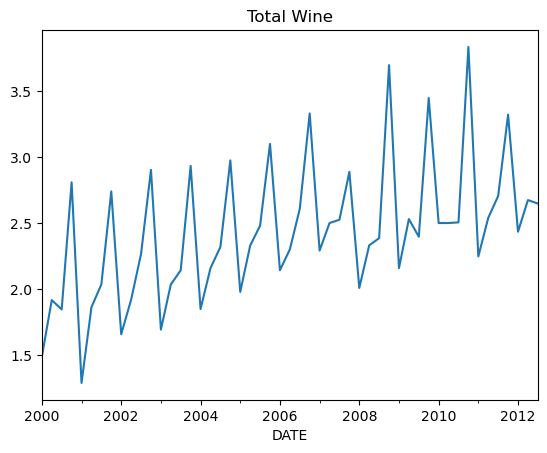

In [8]:
plt.figure
alcohol_consumption.TotalWine.plot()
plt.title("Total Wine")

Text(0, 0.5, 'Autocorrelation')

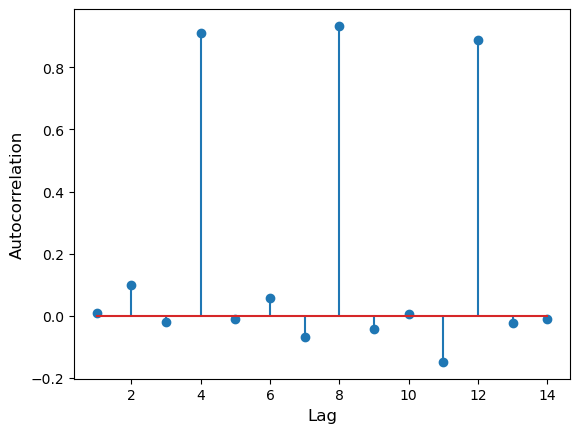

In [9]:
lags = range(1, 15)
autocorrs = [alcohol_consumption.TotalWine.autocorr(lag=lag) for lag in lags]
plt.figure()
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

# Note that you can also use `plot_acf`, by using `from statsmodels.graphics.tsaplots import plot_acf`

A time series can be correlated, as we just saw, with other time series. But it may also be correlated with itself. This is called autocorrelation and represents the similarity of a time series with a lagged version of itself. If a time series shows autocorrelation there might also be seasonality. 

Let's take a look at an example. We will have to set a certain lag for computing the autocorrelation. In this case we are going to test an array of different lags. What we can see is that there seems to be autocorrelation when using multiples of 4, this may be exactly the effect of seasonality, which repeats every 4 time steps (quarters).

## Partial autocorrelation

As we notice from the autocorrelation plot above, when seasonal effects are present, we see spikes in the autocorrelation at multiples of the seasonal component. For example, if we have annual seasonality in quarterly data, we see high autocorrelation at lag 4, but also at lags 8, 12, and so on. 

The partial autocorrelation provides the correlation of a time series with lagged versions of itself, however it also removes linear effects from other lags. This makes it extremely useful for identifying the true correlated behaviour. 

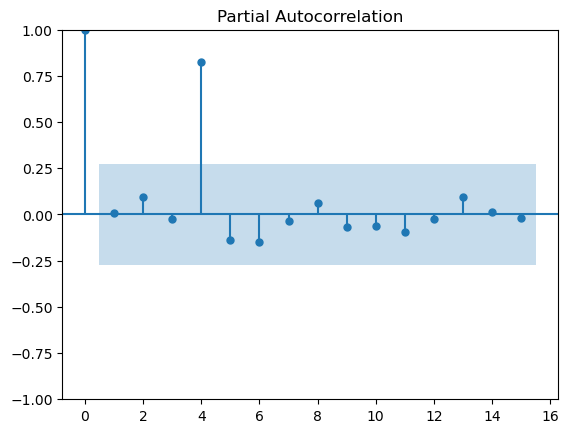

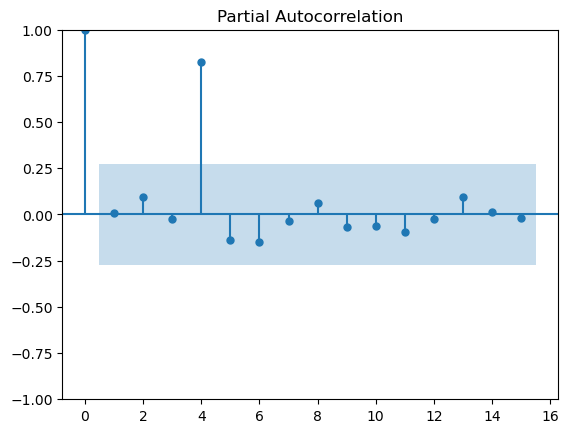

In [10]:
plot_pacf(alcohol_consumption.TotalWine, method="ywm", lags=15)

## Stationarity

A common assumption in many time series analysis techniques is that **the data are stationary**. 

<br>
A stationary time series has the property that **the mean, variance and autocorrelation structure do not change over time**. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality). There are statistical tests to check for stationarity (same for correlation, trend, etc.).

Generally, a very common assumption made by time series analysis techniques is that data is stationary, so this is also a very common preprocessing step (together with the ones we have seen before). A stationary time series has the property that the mean, variance and autocorelation do not change over time. So, for our purpose a time series without trend, constant variance and no seasonality will be considered to be stationary. 

One of the key statistical tests for stationarity is the Augmented Dickey Fuller test. We'll use this in subsequent modules, however we can illustrate how it works with both the bikes and alcohol consumption datasets. The documentation is given [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html). 

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative being that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root. We won't dive into the maths here but the key to remember is: **unit root -> non-stationary**.

In [11]:
from statsmodels.tsa.stattools import adfuller


def testStationarity(x, alpha=0.05):
    results = adfuller(x)
    pvalue = results[1]
    if pvalue < alpha:
        return "Reject the null: the time series is stationary"
    else:
        return "Accept the null: the time series is non-stationary"

'Reject the null: the time series is stationary'

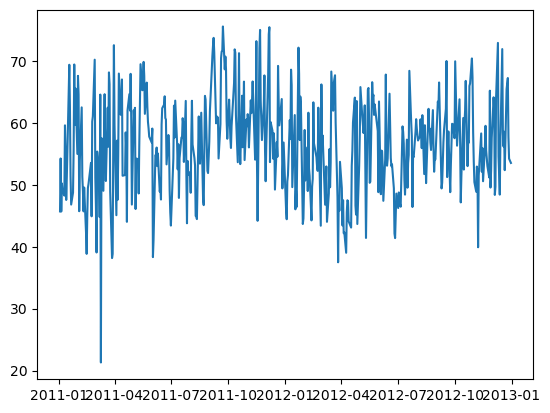

In [12]:
plt.figure()
plt.plot(bikes.humidity)

testStationarity(bikes.humidity)

'Accept the null: the time series is non-stationary'

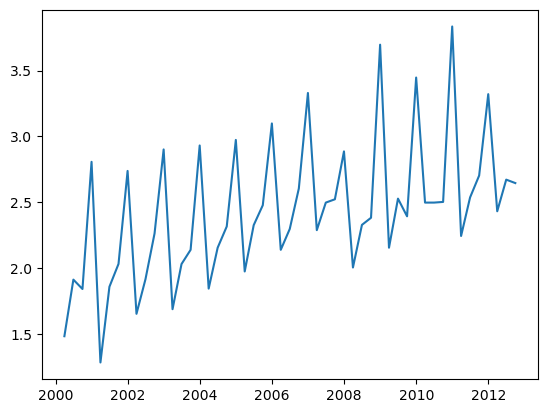

In [13]:
plt.figure()
plt.plot(alcohol_consumption.TotalWine)

testStationarity(alcohol_consumption.TotalWine)

We will explore how to deal with stationarity in the next module. 

## Takeaways
* We often model time series data as consisting of a **trend and seasonal component**, together with some observational **noise**.  
* Visualising time series is an important step to identifying patterns, trends, and types of activity.
* Autocorrelation and partial autocorrelation expose internal correlations in a time series 
* Stationarity is an important attribute of time series which many models assume. 